In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import prepare

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Exercise

#### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

#### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [3]:
df = pd.read_csv('store_item_sales.csv')

In [4]:
df = prepare.prepare_store_items_sale(df)

In [7]:
df.head()

,Unnamed: 0,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,0,13,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,<bound method inherit_from_data.<locals>.metho...,10.92
2013-01-01 00:00:00+00:00,211816,26,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,<bound method inherit_from_data.<locals>.metho...,218.40
2013-01-01 00:00:00+00:00,832656,27,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,<bound method inherit_from_data.<locals>.metho...,125.55
2013-01-01 00:00:00+00:00,213642,54,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,<bound method inherit_from_data.<locals>.metho...,453.60
2013-01-01 00:00:00+00:00,215468,35,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,<bound method inherit_from_data.<locals>.metho...,294.00


In [8]:
#numpy aggregation functions (mean, median, prod, sum, std,
df2 = df.groupby('sale_date').sales_total.aggregate('sum').reset_index().set_index('sale_date')
df2.shape

(1826, 1)

In [82]:
#reference of the sales column.
df1 = df.resample('D').sales_total.sum().reset_index().set_index('sale_date')
df1.shape

(1826, 1)

In [77]:
df1.head()

,sale_date,sales_total
0,2013-01-01 00:00:00+00:00,73844.01
1,2013-01-02 00:00:00+00:00,73570.58
2,2013-01-03 00:00:00+00:00,78169.48
3,2013-01-04 00:00:00+00:00,84467.73
4,2013-01-05 00:00:00+00:00,87621.85


In [10]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Shape: (913000, 17)


In [11]:
df1.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85


--------

## Splitting Dataset

In [83]:
#can utilize percentage based split or human based split which is basically stating the year.
train = df1[:'2016'] # includes 2016
test = df1['2017']

#specified target
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Freq: D, Name: sales_total, dtype: float64

------------

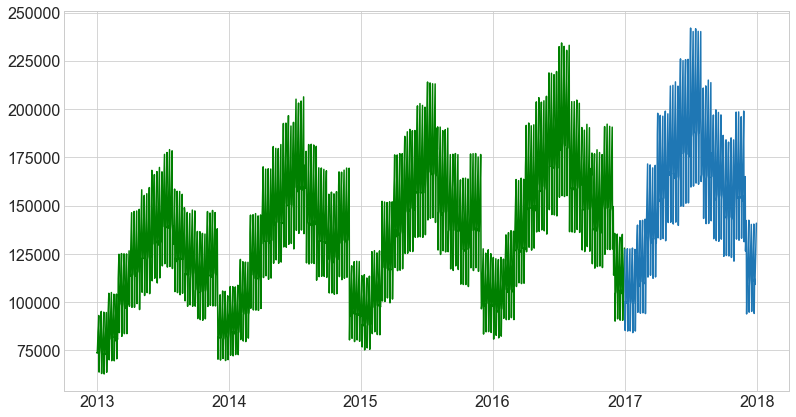

In [86]:
#looking at the train and test
plt.plot(train.index, train.sales_total, color = 'green')
plt.plot(test.index, test.sales_total)

------

## Want to focus on the target here. Visualize the target over time and change overtime.

<AxesSubplot:ylabel='Frequency'>

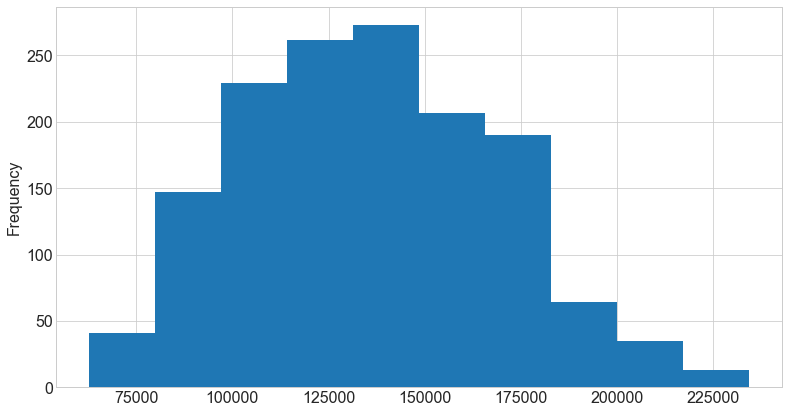

In [87]:
## looking into the distribution of the target, appears to be slightly skewed right but normally distributed
y.plot.hist()

[Text(0.5, 1.0, 'Average Sales Total by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Total_Sales')]

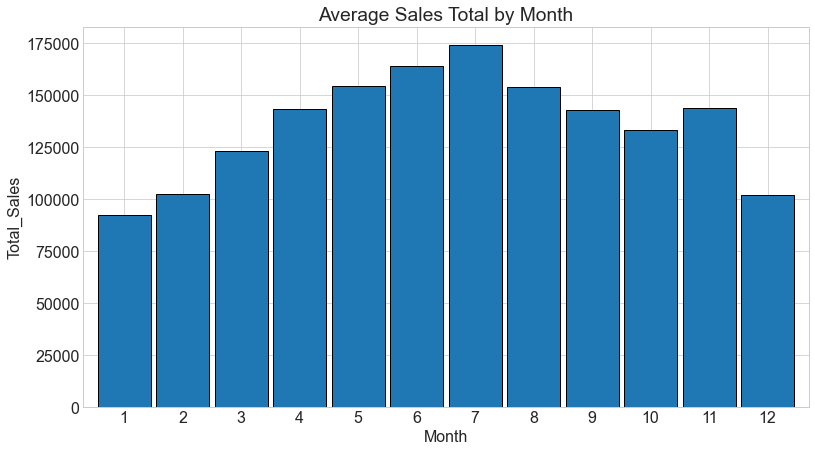

In [43]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Total by Month', xlabel='Month', ylabel='Total_Sales ')

[Text(0.5, 1.0, 'Average sales toal by Weekday'),
 Text(0.5, 22.200000000000003, 'Weekday'),
 Text(22.481250000000003, 0.5, 'Sales_total')]

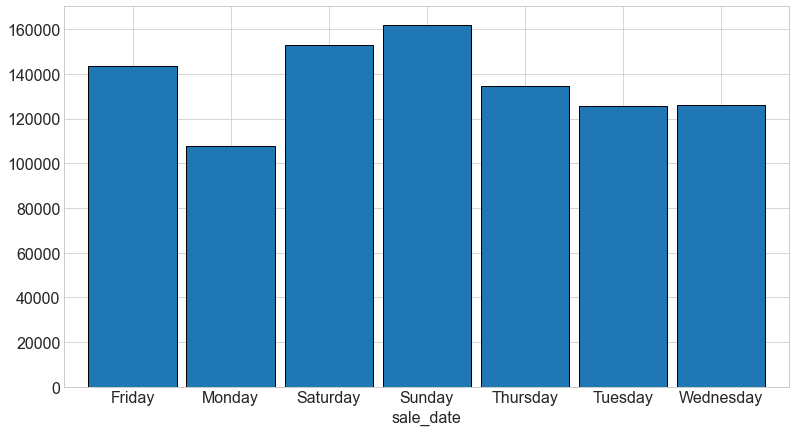

In [69]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average sales toal by Weekday', xlabel='Weekday', ylabel='Sales_total')

In [39]:
def time_period_comparison(df):
    '''
    NOTE: Index must be date and datatype must be datatime type. Utilize after prepare.
    function which allows you to input specific day, weeks, months, year and 
    show 2 time periods.
    '''
    plt.subplot(2,1,1)
    print('specifiy time period for first plot, then title')
    df.resample(input()).mean().plot(title = str(input()))
    
    
    plt.subplot(2,1,2)
    print('specifiy time period for second plot, then title')
    df.resample(input()).mean().plot(title = str(input()))
    
    



<AxesSubplot:xlabel='weekday', ylabel='sales_total'>

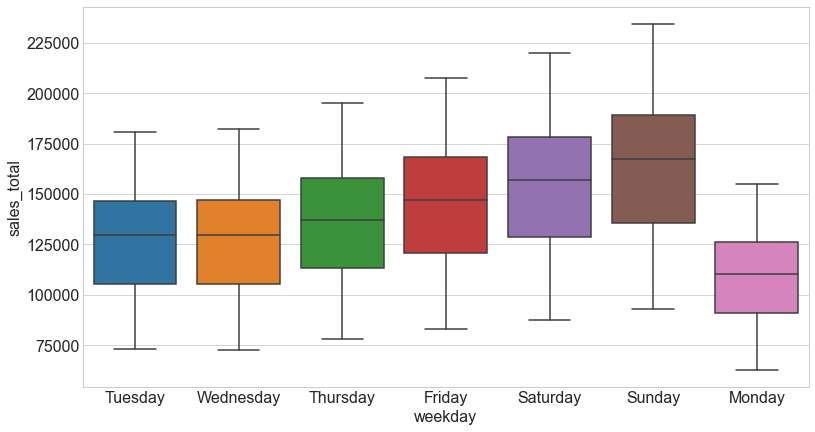

In [71]:
(y.reset_index()
    .assign(weekday=lambda df: df.sale_date.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='sales_total', x='weekday'))

-------

## Move into Visualizing the target over time

### Resample:

In [30]:
## function to show Days weeks month year.

def dy_wk_mth_yr_plot(df):
    '''
    function which will plot Day, Week, Month, and Year
    for target
    '''
    
    df.resample('D').mean().plot(alpha=.5, label='Daily')
    df.resample('W').mean().plot(alpha=.8, label='Weekly')
    df.resample('M').mean().plot(label='Montly')
    df.resample('Y').mean().plot(label='Yearly')
    plt.legend()

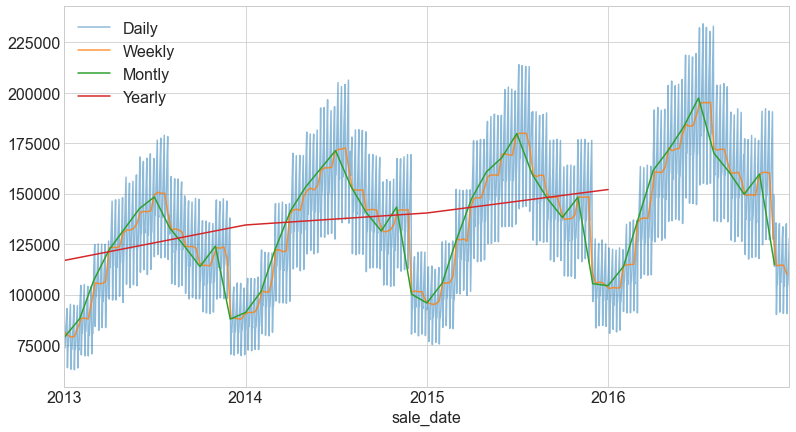

In [72]:
dy_wk_mth_yr_plot(y)

### Addition to resample can utilize rolling method

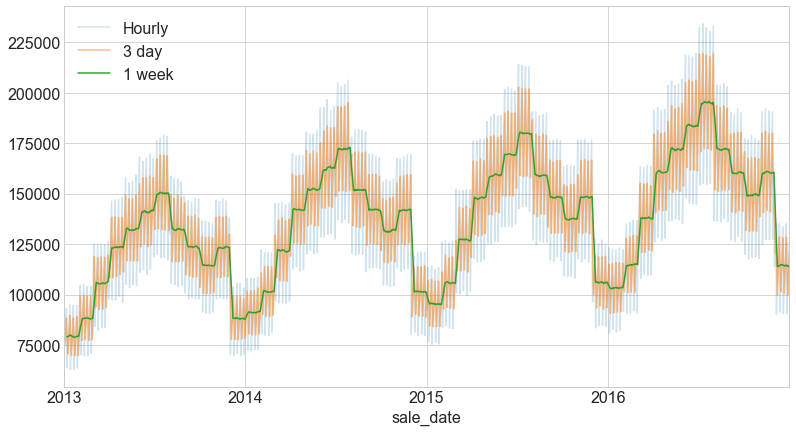

In [92]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

-------

### Visualize change over time

<AxesSubplot:title={'center':'Average week-to-week change in total_sales'}, xlabel='sale_date'>

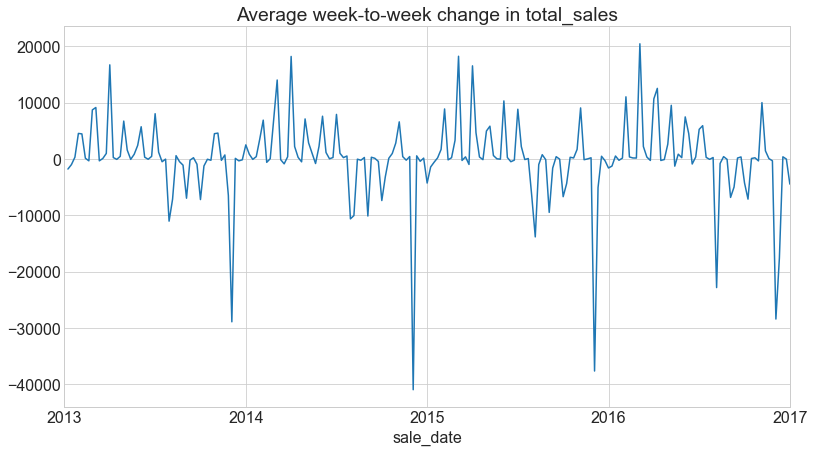

In [56]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in total_sales')

<AxesSubplot:title={'center':'Average month-to-month change in total_sales'}, xlabel='Date'>

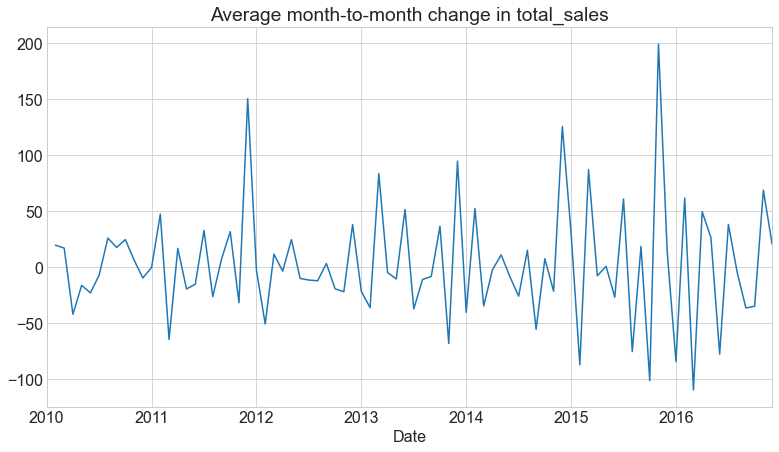

In [44]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in total_sales')

<AxesSubplot:title={'center':'Average month-to-month change in total_sales'}, xlabel='sale_date'>

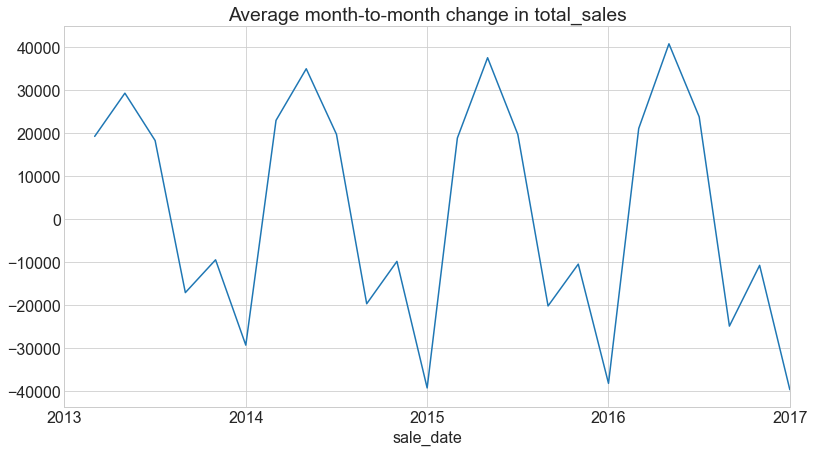

In [94]:
y.resample('2M').mean().diff().plot(title='Average month-to-month change in total_sales')

---------

### Seasonal

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

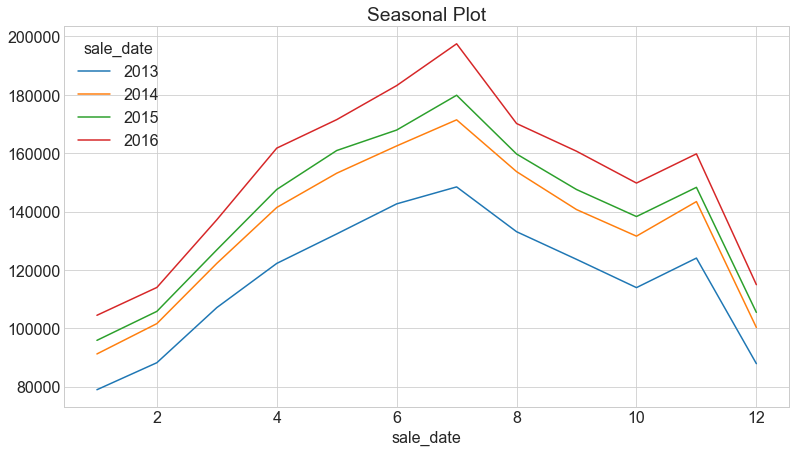

In [59]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

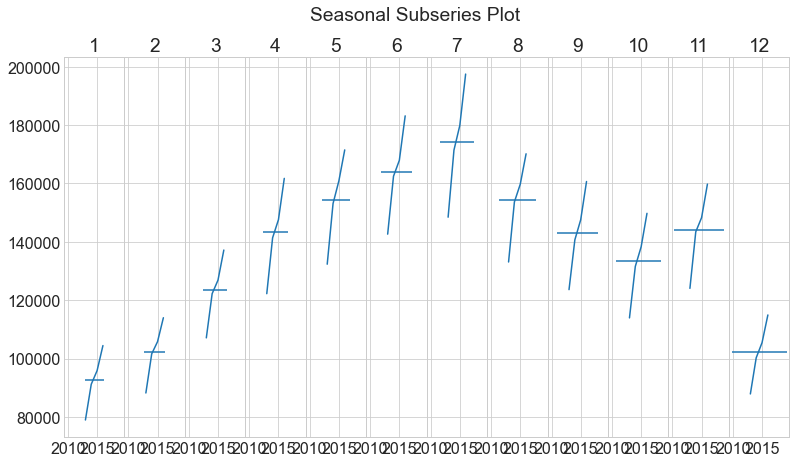

In [95]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

-------

### Lag Plot

Text(0.5, 1.0, 'Lag plot with lag=1')

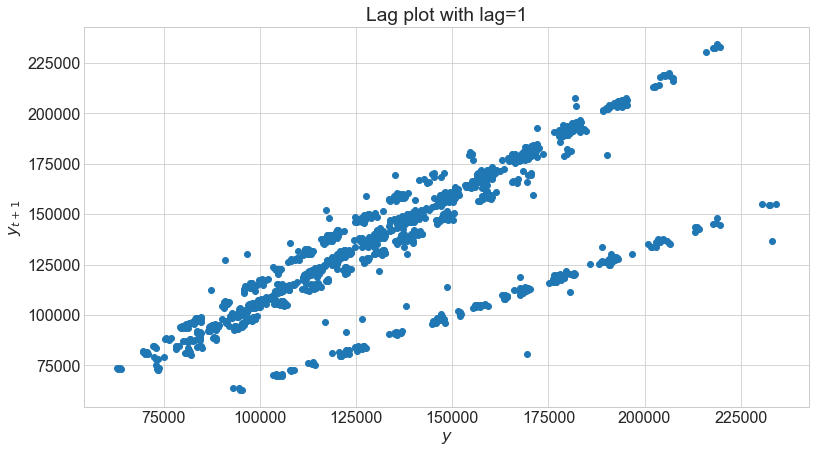

In [96]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

<ipython-input-98-cd525f17ab43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t + 1)'] = train.sales_total.shift(-1)


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

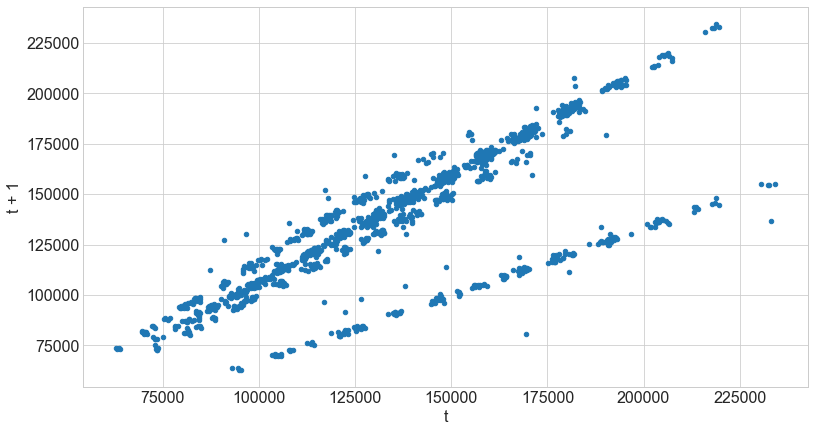

In [98]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [99]:
del train['y(t + 1)']

,this_week,the_next_week
sale_date,,
2013-01-06 00:00:00+00:00,81794.583333,79990.601429
2013-01-13 00:00:00+00:00,79990.601429,78973.360000
2013-01-20 00:00:00+00:00,78973.360000,79272.691429
2013-01-27 00:00:00+00:00,79272.691429,83792.507143
2013-02-03 00:00:00+00:00,83792.507143,88227.801429
...,...,...
2016-12-04 00:00:00+00:00,131884.498571,114279.947143
2016-12-11 00:00:00+00:00,114279.947143,114649.321429
2016-12-18 00:00:00+00:00,114649.321429,114615.500000


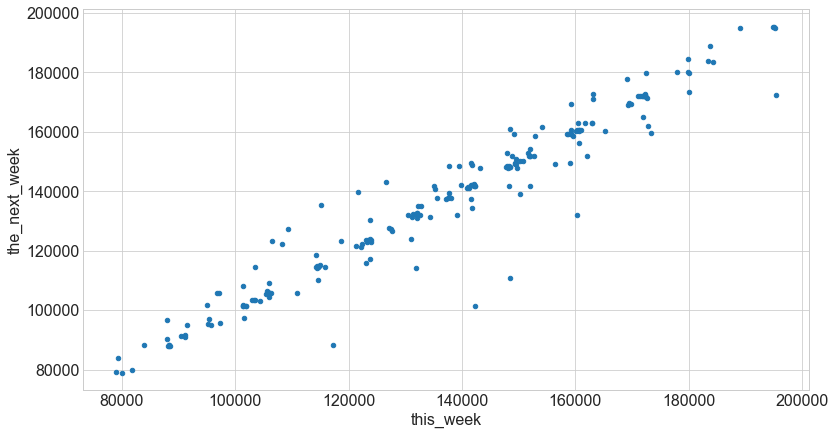

In [101]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,this_week,12_weeks_out
sale_date,,
2013-01-06 00:00:00+00:00,81794.583333,106501.331429
2013-01-13 00:00:00+00:00,79990.601429,123193.640000
2013-01-20 00:00:00+00:00,78973.360000,123430.685714
2013-01-27 00:00:00+00:00,79272.691429,123345.042857
2013-02-03 00:00:00+00:00,83792.507143,123791.114286
...,...,...
2016-12-04 00:00:00+00:00,131884.498571,NaN
2016-12-11 00:00:00+00:00,114279.947143,NaN
2016-12-18 00:00:00+00:00,114649.321429,NaN


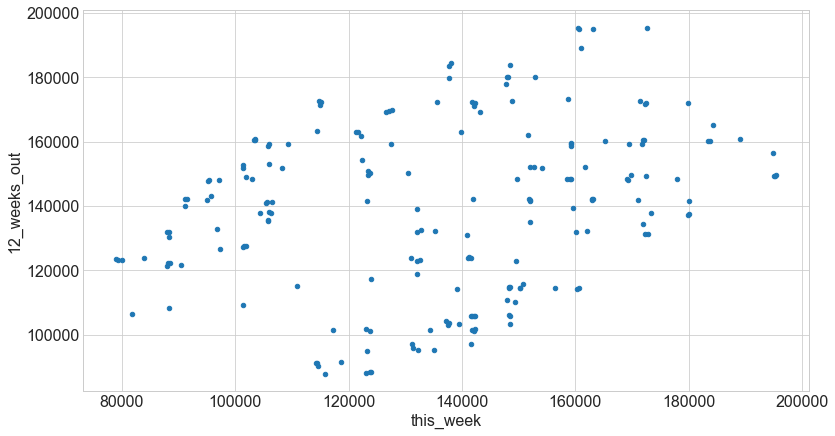

In [102]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,half_a_year_later
sale_date,,
2013-01-06 00:00:00+00:00,81794.583333,149604.697143
2013-01-13 00:00:00+00:00,79990.601429,150789.424286
2013-01-20 00:00:00+00:00,78973.360000,150282.567143
2013-01-27 00:00:00+00:00,79272.691429,150242.265714
2013-02-03 00:00:00+00:00,83792.507143,139188.128571
...,...,...
2016-12-04 00:00:00+00:00,131884.498571,NaN
2016-12-11 00:00:00+00:00,114279.947143,NaN
2016-12-18 00:00:00+00:00,114649.321429,NaN


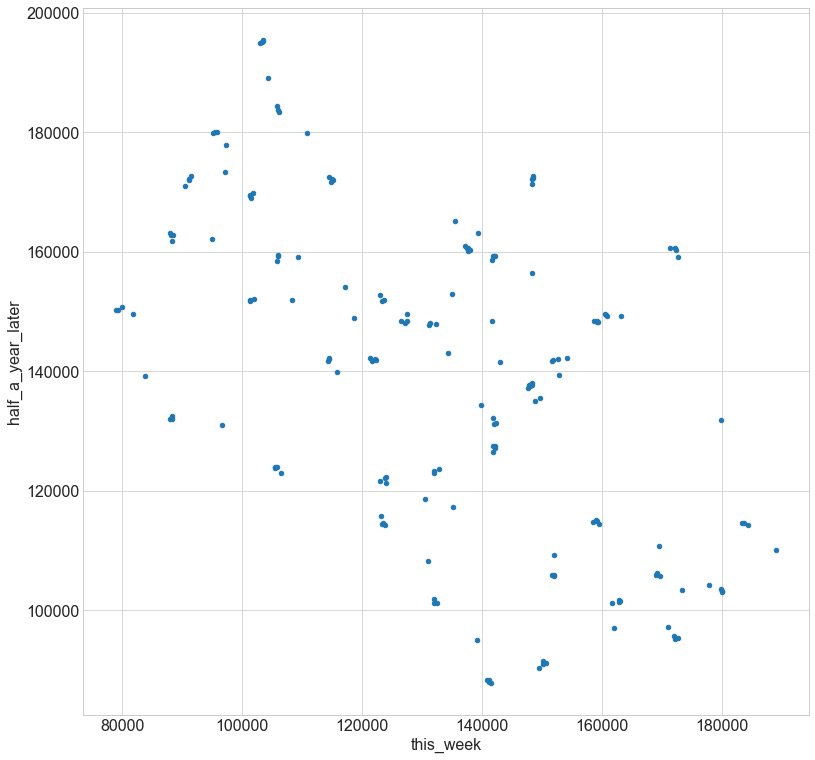

In [103]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

# Pandas built in Lag Plot!!!

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

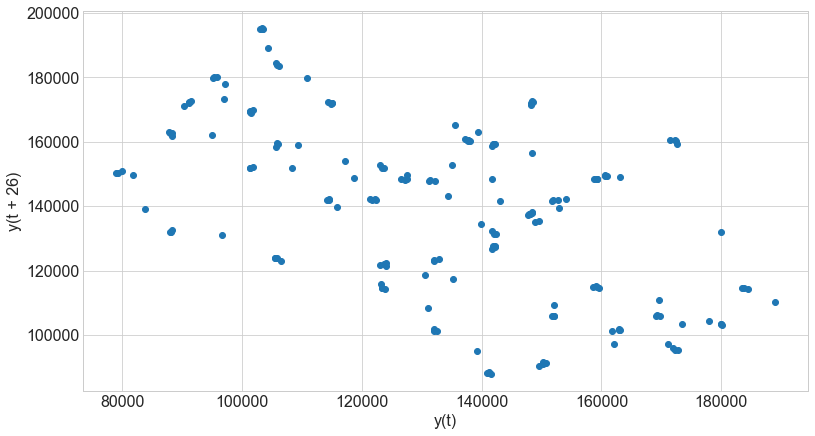

In [104]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

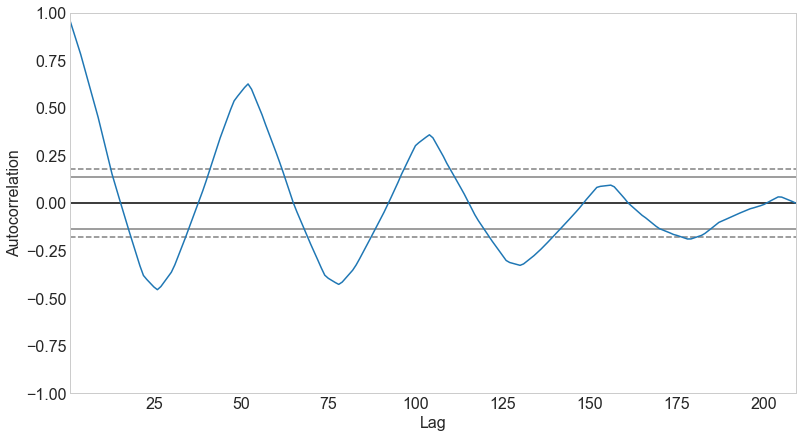

In [106]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

### Seasonal Decomposition

In [107]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,NaN,-38717.394736,NaN
2013-01-13 00:00:00+00:00,79990.601429,NaN,-39612.878742,NaN
2013-01-20 00:00:00+00:00,78973.360000,NaN,-39952.141819,NaN
2013-01-27 00:00:00+00:00,79272.691429,NaN,-40129.678568,NaN
2013-02-03 00:00:00+00:00,83792.507143,NaN,-38676.346096,NaN


<AxesSubplot:xlabel='sale_date'>

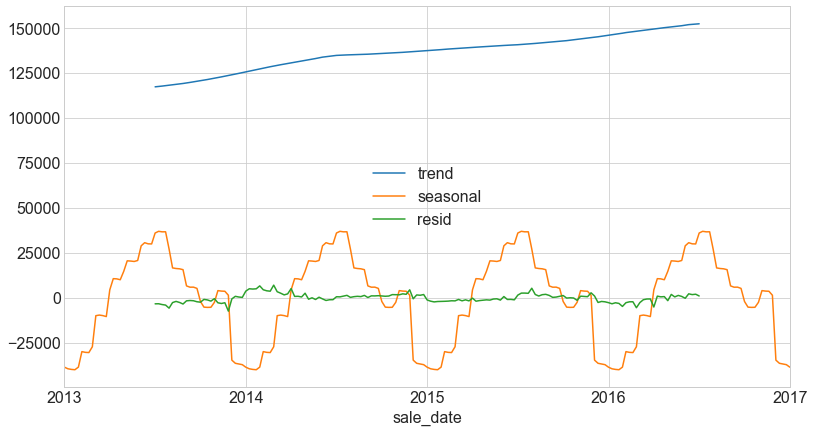

In [108]:
decomposition.iloc[:, 1:].plot()

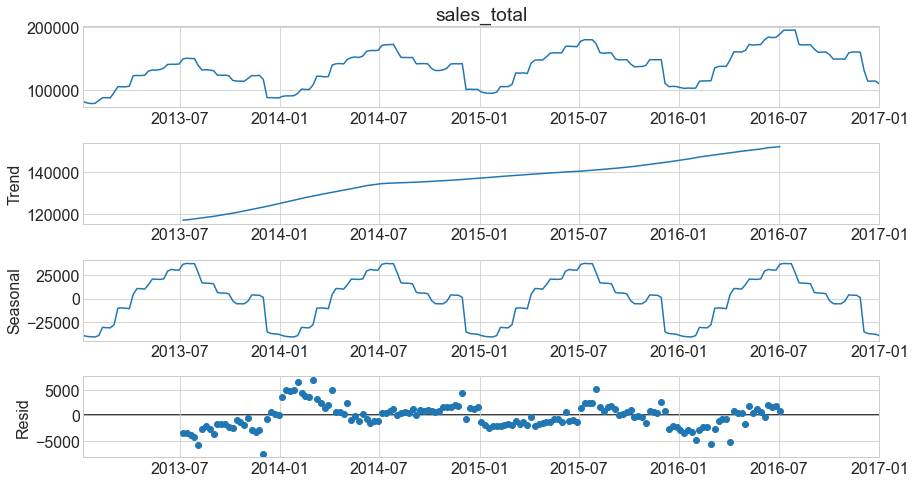

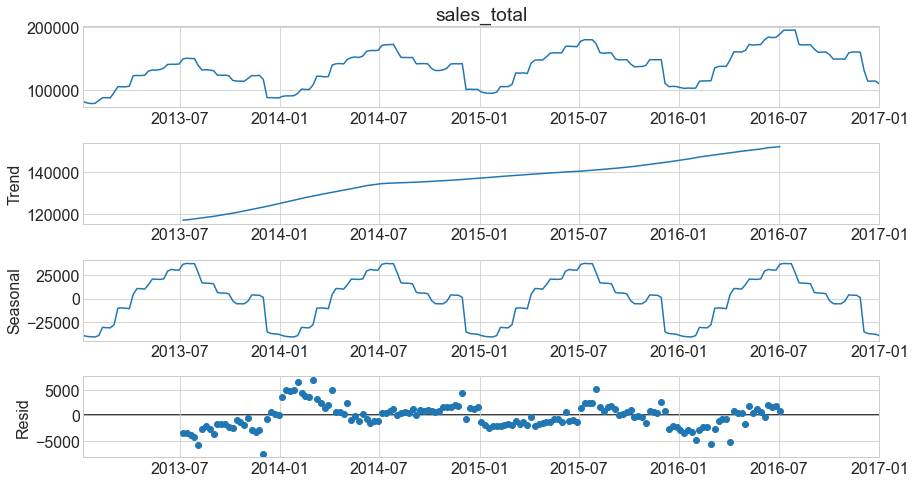

In [109]:
result.plot()

---------

### Categories Overtime 

In [110]:
train = train.resample('D').mean()
# create a categorical feature
train['sales_total_bin'] = pd.qcut(train.sales_total, 4)
train.groupby('sales_total_bin').mean()

,sales_total
sales_total_bin,
"(62788.619000000006, 112176.34]",94739.804180
"(112176.34, 136014.55]",123464.918767
"(136014.55, 158921.74]",146851.109479
"(158921.74, 234271.74]",179242.488658


In [76]:
(train.groupby('sales_total_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

KeyError: 'sales_total_bin'

[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

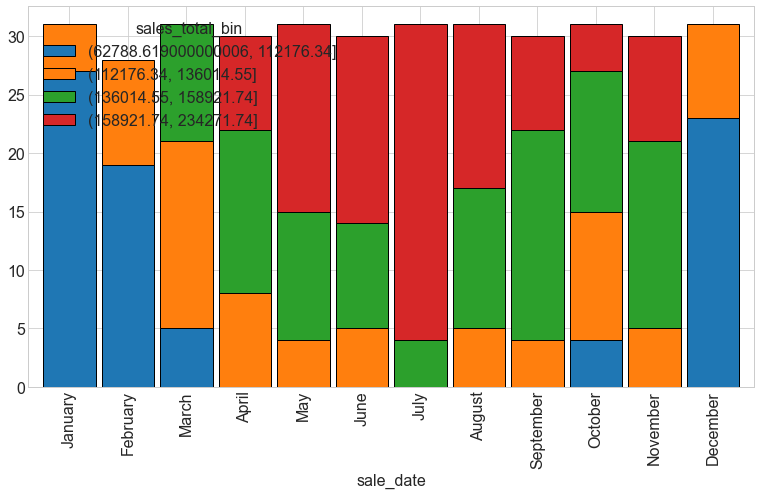

In [113]:
ax = (train['2015']
 .groupby('sales_total_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

------

### strftime

#### - A common problem we can run into when visualizing time series data is that the order of the months or days of the week logically is not the same as the order alphabetically. One workaround for this is to format the dates such that the have a number prepended to them 

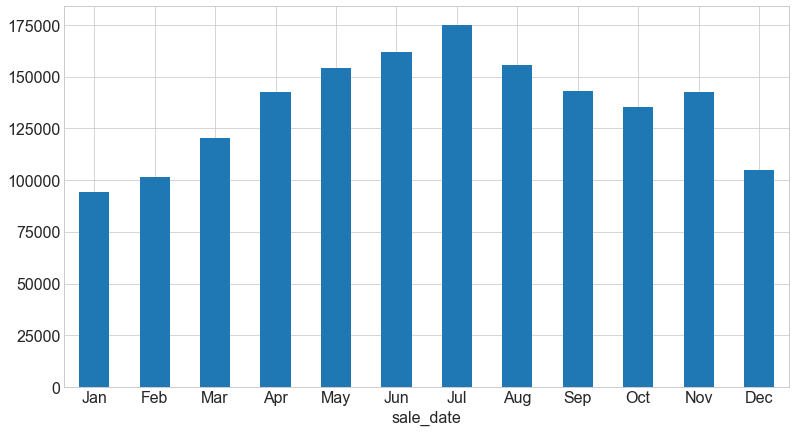

In [114]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

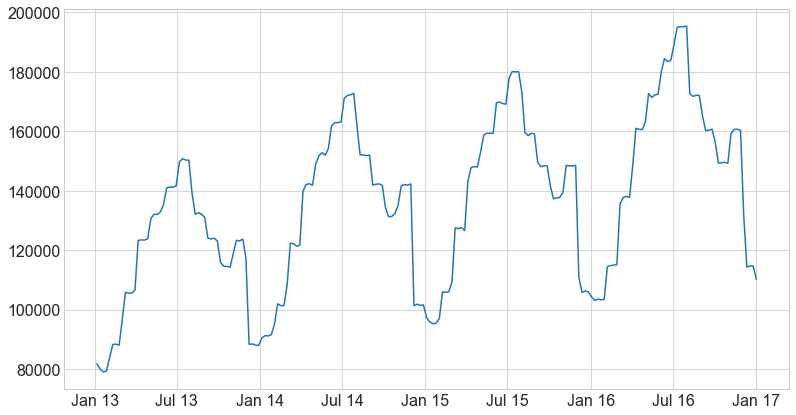

In [115]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

-------

# Germany Dataset

In [3]:
df = pd.read_csv('germany_power.csv')

In [4]:
df.head()

,Unnamed: 0,Date,Consumption,Wind,Solar,Wind+Solar
0,0,2006-01-01,1069.184,NaN,NaN,NaN
1,1,2006-01-02,1380.521,NaN,NaN,NaN
2,2,2006-01-03,1442.533,NaN,NaN,NaN
3,3,2006-01-04,1457.217,NaN,NaN,NaN
4,4,2006-01-05,1477.131,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4383 non-null   int64  
 1   Date         4383 non-null   object 
 2   Consumption  4383 non-null   float64
 3   Wind         2920 non-null   float64
 4   Solar        2188 non-null   float64
 5   Wind+Solar   2187 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 205.6+ KB


In [6]:
df = prepare.prepare_german(df)


In [7]:
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              4383 non-null   datetime64[ns]
 1   Unnamed: 0        4383 non-null   int64         
 2   Consumption       4383 non-null   float64       
 3   Wind              4383 non-null   float64       
 4   Solar             4383 non-null   float64       
 5   Wind+Solar        4383 non-null   float64       
 6   month             4383 non-null   int64         
 7   year              4383 non-null   int64         
 8   wind_solar_custm  4383 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 308.3 KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4383 non-null   int64  
 1   Consumption       4383 non-null   float64
 2   Wind              4383 non-null   float64
 3   Solar             4383 non-null   float64
 4   Wind+Solar        4383 non-null   float64
 5   month             4383 non-null   int64  
 6   year              4383 non-null   int64  
 7   wind_solar_custm  4383 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 308.2 KB


In [9]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2006-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (4383, 8)


In [12]:
#numpy aggregation functions (mean, median, prod, sum, std,
df1 = df.groupby('Date').wind_solar_custm.aggregate('sum').reset_index().set_index('Date')
df1.shape

(4383, 1)

In [17]:
df1[df1.index.value_counts() > 1]

<ipython-input-17-b7c745f5eb85>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[df1.index.value_counts() > 1]


,wind_solar_custm
Date,


In [116]:
#reference of the sales column.
df2 = df.resample('D').wind_solar_custm.sum().reset_index().set_index('Date')
df2.shape

(4383, 1)

In [19]:
df2

,wind_solar_custm
Date,
2006-01-01,0.000
2006-01-02,0.000
2006-01-03,0.000
2006-01-04,0.000
2006-01-05,0.000
...,...
2017-12-27,411.037
2017-12-28,520.586
2017-12-29,614.131


In [22]:
print('Date Range:', df1.index.min(), 'to', df.index.max())
print('Shape:', df1.shape)

Date Range: 2006-01-01 00:00:00 to 2017-12-31 00:00:00
Shape: (4383, 1)


-----

## Splitting the Dataset.

In [117]:
train = df2['2010':'2016'] # includes 2016
test = df2['2017']

#specified target
y = train.wind_solar_custm
y.head()

Date
2010-01-01    48.709
2010-01-02    24.628
2010-01-03    22.963
2010-01-04    59.318
2010-01-05    41.624
Name: wind_solar_custm, dtype: float64

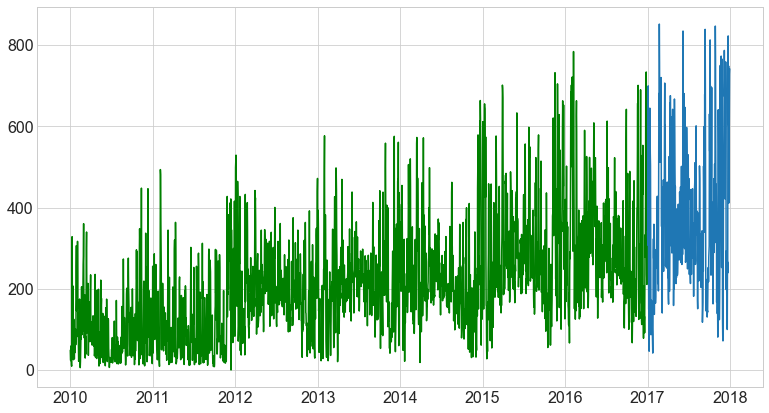

In [26]:
#looking at the train and test
plt.plot(train.index, train.wind_solar_custm, color = 'green')
plt.plot(test.index, test.wind_solar_custm)

## Want to focus on the target here. Visualize the target over time and change overtime.

<AxesSubplot:ylabel='Frequency'>

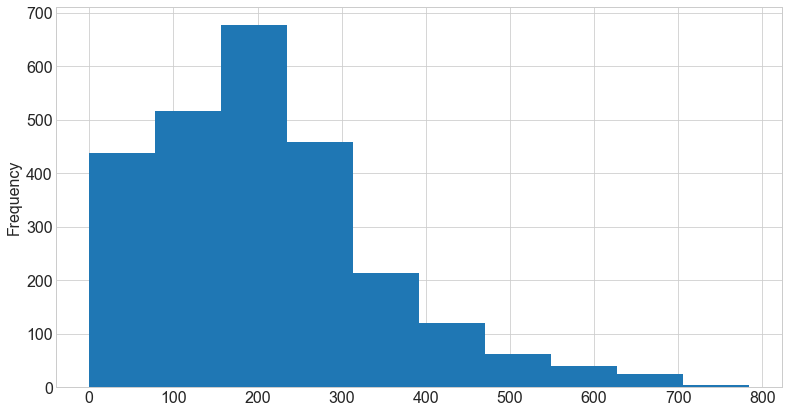

In [27]:
# looking at distribution of the target
y.plot.hist()

[Text(0.5, 1.0, 'Average Wind + Solar Custome'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Wind+Solar_cust ')]

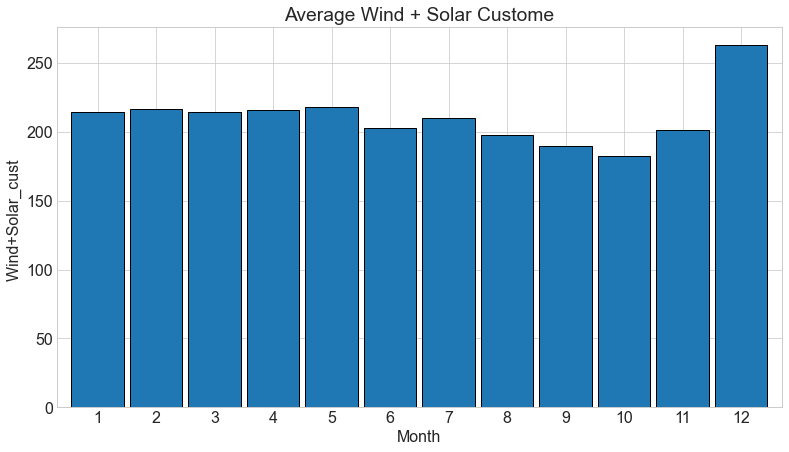

In [28]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Wind + Solar Custome', xlabel='Month', ylabel='Wind+Solar_cust ')

[Text(0.5, 1.0, 'Average Wind+Solar_cust by Weekday'),
 Text(0.5, 22.200000000000003, 'Weekday'),
 Text(22.481250000000003, 0.5, 'Wind+Solar_custom')]

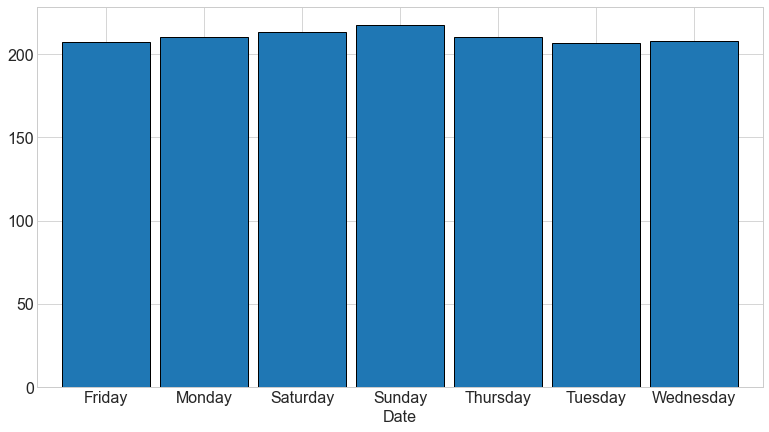

In [29]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Wind+Solar_cust by Weekday', xlabel='Weekday', ylabel='Wind+Solar_custom')

<AxesSubplot:xlabel='weekday', ylabel='wind_solar_custm'>

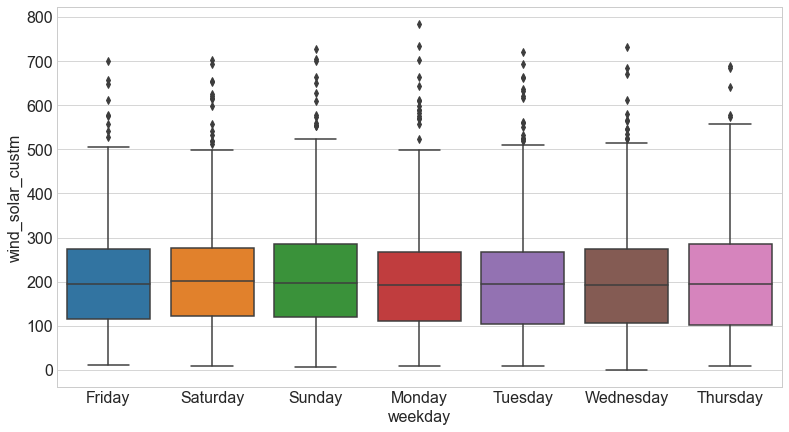

In [35]:
(y.reset_index()
    .assign(weekday=lambda df: df.Date.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='wind_solar_custm', x='weekday'))

------

## Move into Visualizing the target over time

In [36]:
## function to show Days weeks month year.

def dy_wk_mth_yr_plot(df):
    '''
    function which will plot Day, Week, Month, and Year
    for target
    '''
    
    df.resample('D').mean().plot(alpha=.5, label='Daily')
    df.resample('W').mean().plot(alpha=.8, label='Weekly')
    df.resample('M').mean().plot(label='Montly')
    df.resample('Y').mean().plot(label='Yearly')
    plt.legend()


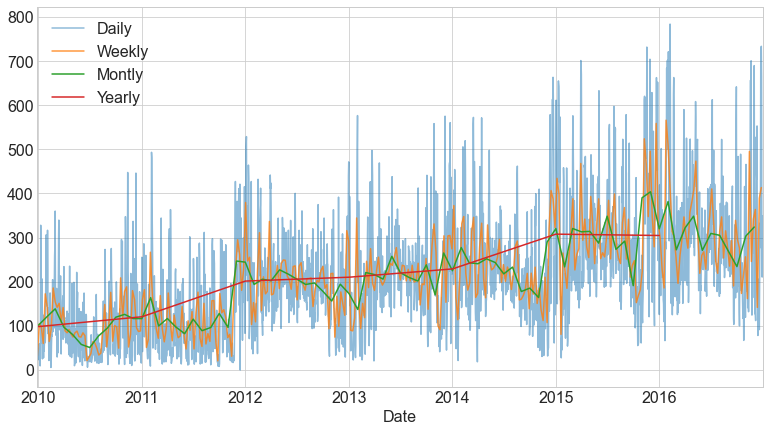

In [37]:
dy_wk_mth_yr_plot(y)

### Addition to resample can utilize rolling method

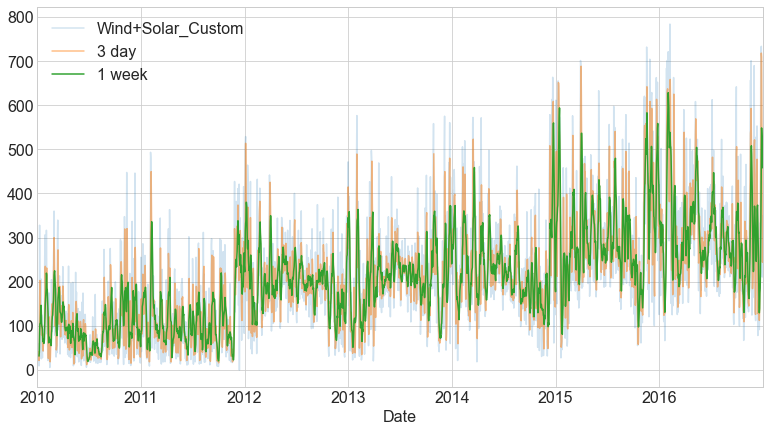

In [40]:
y.plot(alpha=.2, label='Wind+Solar_Custom')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

------

### Visualize change over time

<AxesSubplot:title={'center':'Average week-to-week Wind+Solar_Custom'}, xlabel='Date'>

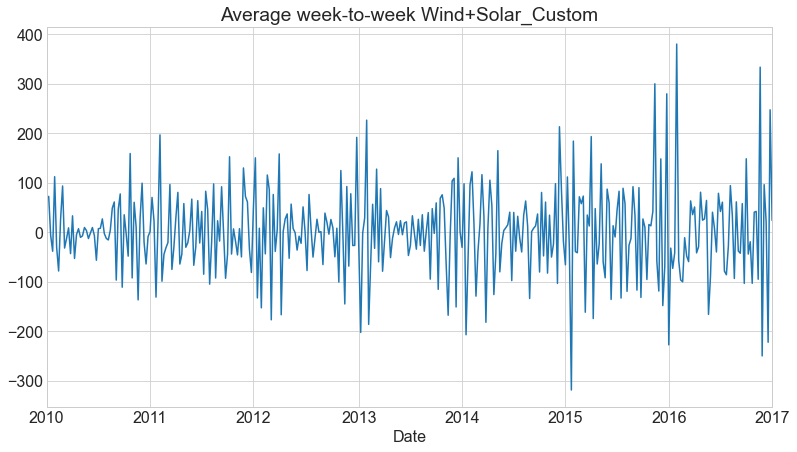

In [43]:
y.resample('W').mean().diff().plot(title='Average week-to-week Wind+Solar_Custom')

<AxesSubplot:title={'center':'Average day-to-day change in total_sales'}, xlabel='Date'>

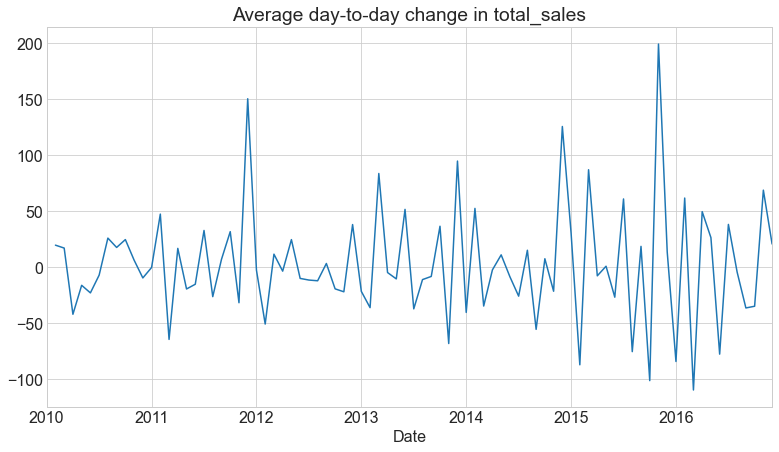

In [45]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in Wind+Solar')

-------

### Seasonal

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

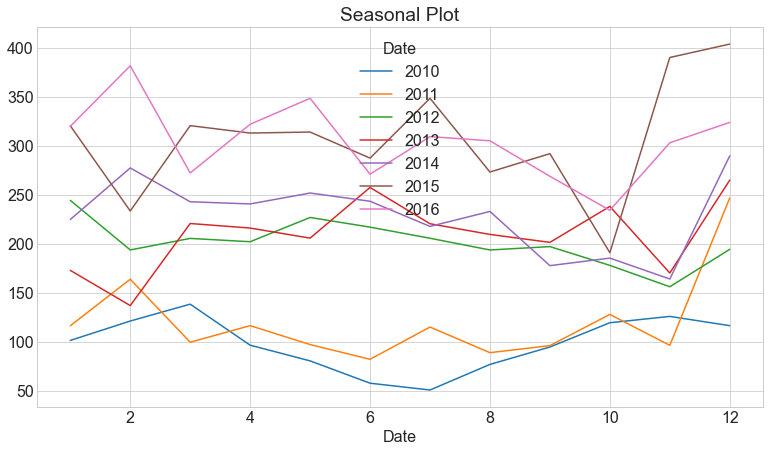

In [46]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

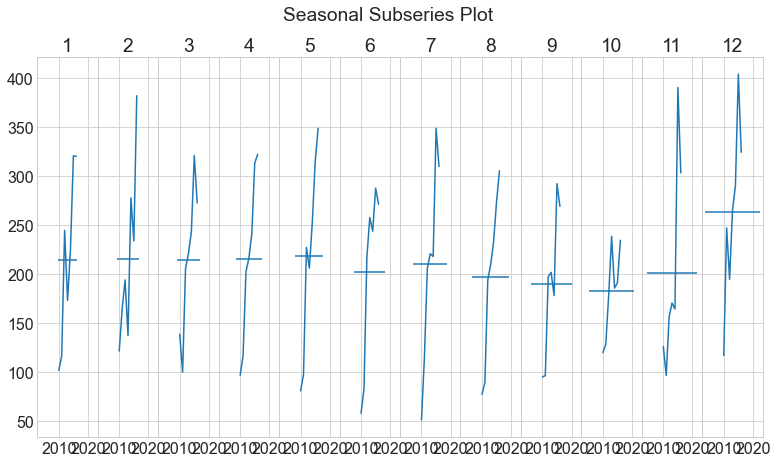

In [47]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

-----

### Lag Plot

Text(0.5, 1.0, 'Lag plot with lag=1')

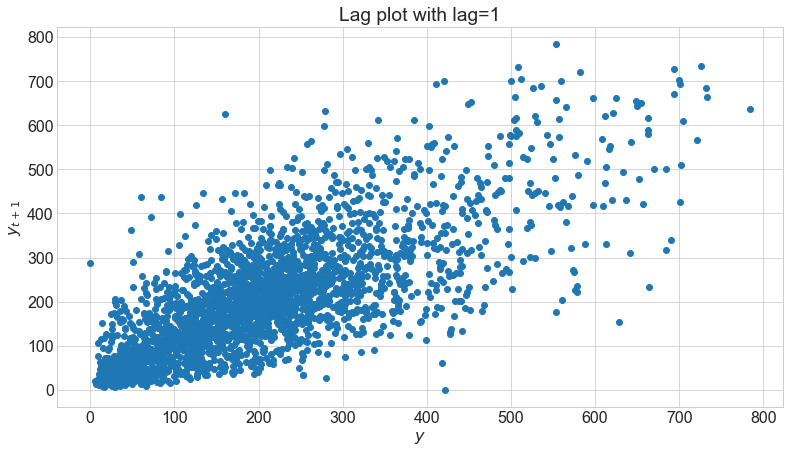

In [48]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

<ipython-input-51-d66c06636bfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t + 1)'] = train.wind_solar_custm.shift(-1)


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

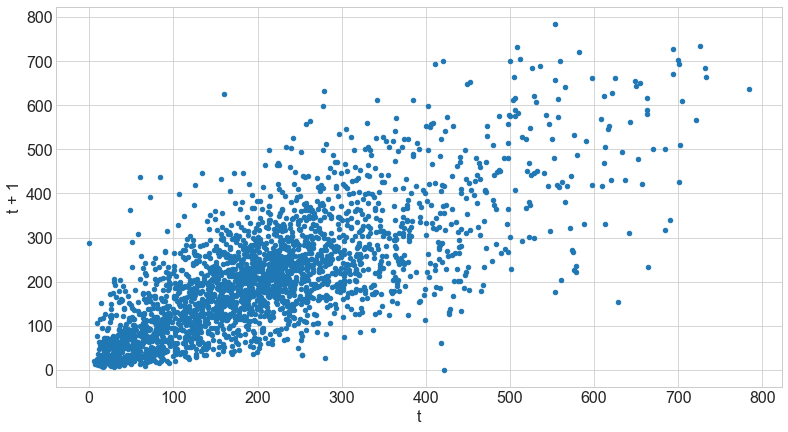

In [51]:
train['y(t + 1)'] = train.wind_solar_custm.shift(-1)
ax = train.plot.scatter(x='wind_solar_custm', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [52]:
del train['y(t + 1)']

,this_week,the_next_week
Date,,
2010-01-03,32.100000,104.730571
2010-01-10,104.730571,98.444000
2010-01-17,98.444000,60.263286
2010-01-24,60.263286,172.649857
2010-01-31,172.649857,142.688143
...,...,...
2016-12-04,342.270429,363.762429
2016-12-11,363.762429,141.891286
2016-12-18,141.891286,389.307857


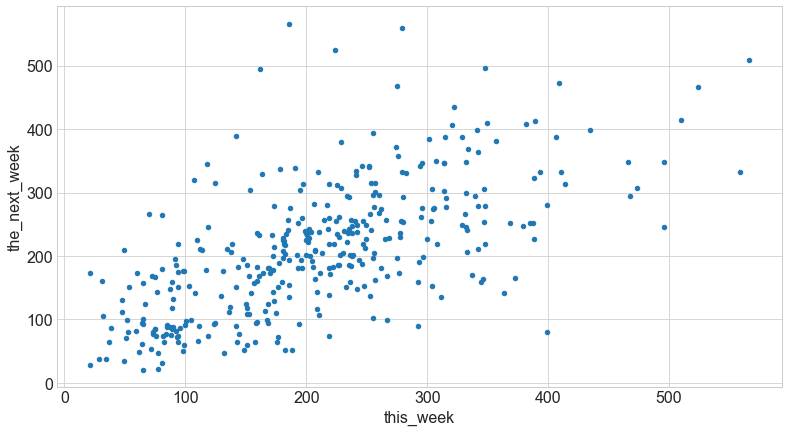

In [54]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.wind_solar_custm.shift(-1)
weekly = weekly.rename(columns={'wind_solar_custm': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,this_week,12_weeks_out
Date,,
2010-01-03,32.100000,108.186286
2010-01-10,104.730571,141.551571
2010-01-17,98.444000,88.901286
2010-01-24,60.263286,84.394857
2010-01-31,172.649857,91.805286
...,...,...
2016-12-04,342.270429,NaN
2016-12-11,363.762429,NaN
2016-12-18,141.891286,NaN


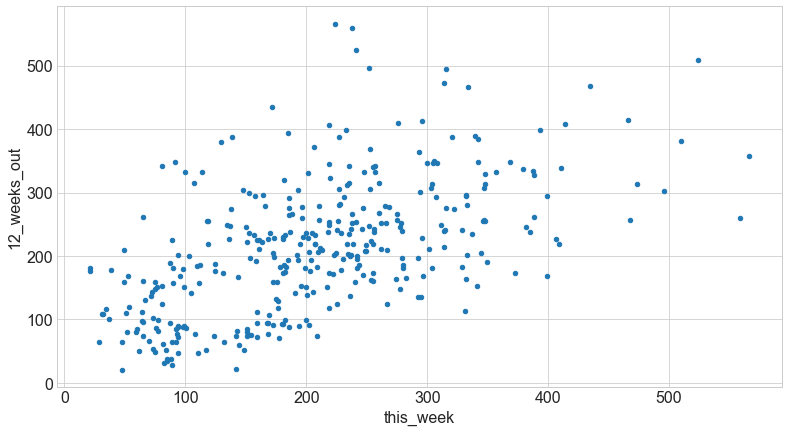

In [55]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.wind_solar_custm.shift(-12)
weekly = weekly.rename(columns={'wind_solar_custm': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,half_a_year_later
Date,,
2010-01-03,32.100000,28.700714
2010-01-10,104.730571,36.971571
2010-01-17,98.444000,64.131286
2010-01-24,60.263286,61.573571
2010-01-31,172.649857,49.322143
...,...,...
2016-12-04,342.270429,NaN
2016-12-11,363.762429,NaN
2016-12-18,141.891286,NaN


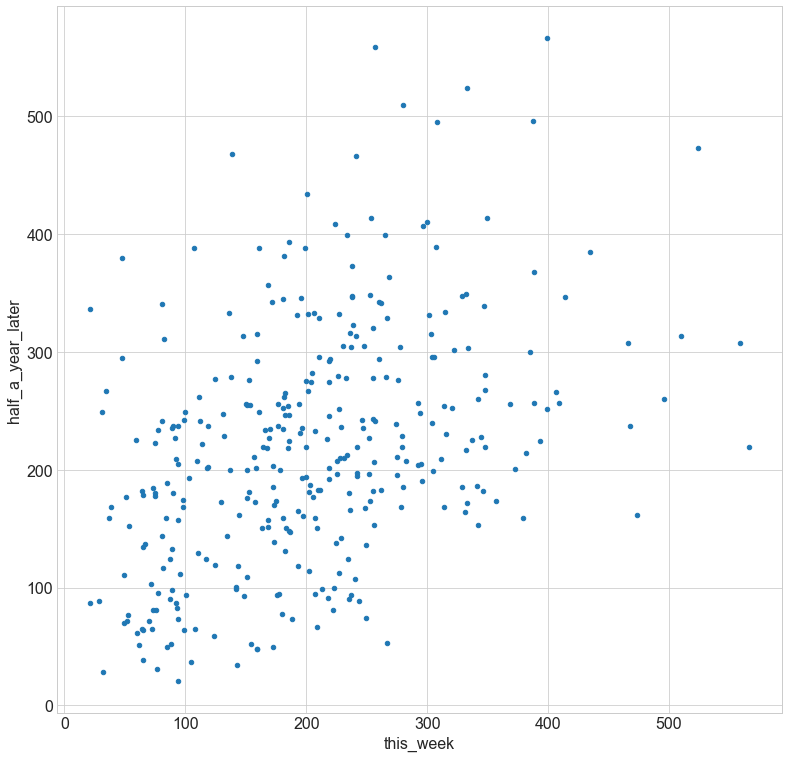

In [56]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.wind_solar_custm.shift(-26)
weekly = weekly.rename(columns={'wind_solar_custm': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

# Pandas built in Lag Plot!!!

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

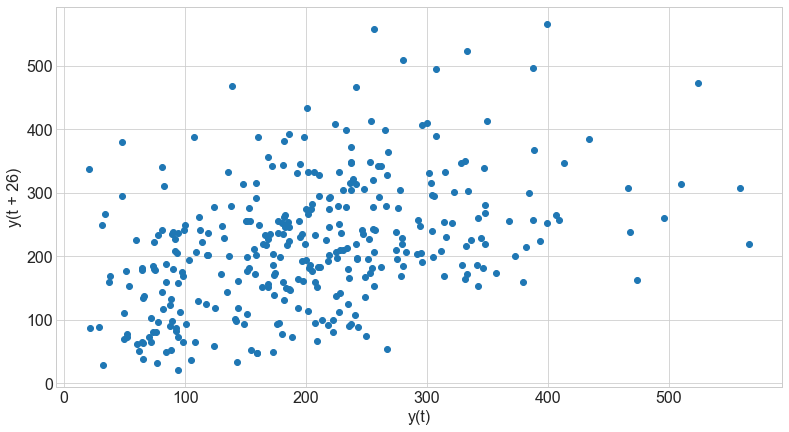

In [57]:
pd.plotting.lag_plot(train.wind_solar_custm.resample('W').mean(), lag=26)

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

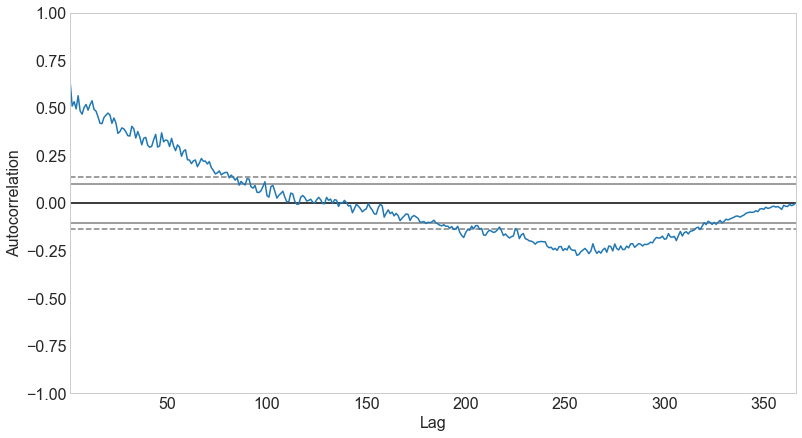

In [58]:
pd.plotting.autocorrelation_plot(train.wind_solar_custm.resample('W').mean())

### Seasonal Decomposition

In [59]:
y = train.wind_solar_custm.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2010-01-03,32.100000,NaN,101.260552,NaN
2010-01-10,104.730571,NaN,79.365150,NaN
2010-01-17,98.444000,NaN,56.092156,NaN
2010-01-24,60.263286,NaN,-17.959096,NaN
2010-01-31,172.649857,NaN,-104.664087,NaN


<AxesSubplot:xlabel='Date'>

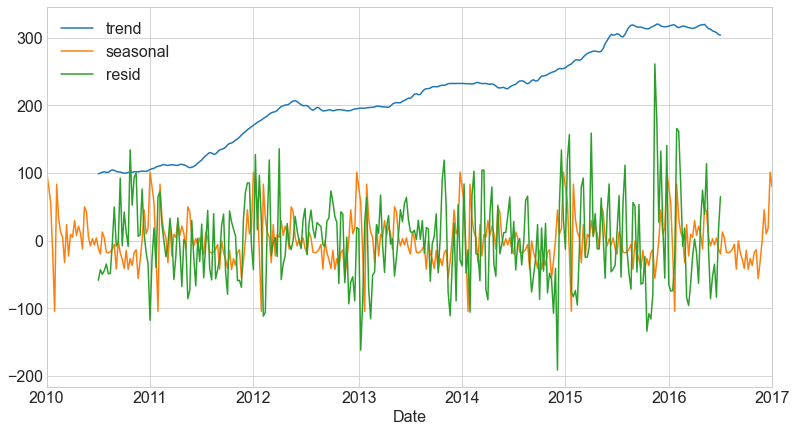

In [66]:
decomposition.iloc[:, 1:].plot()

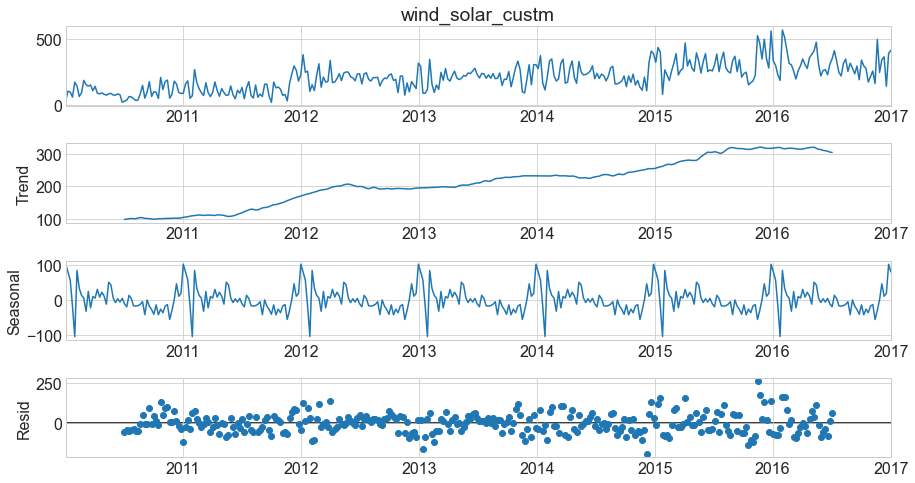

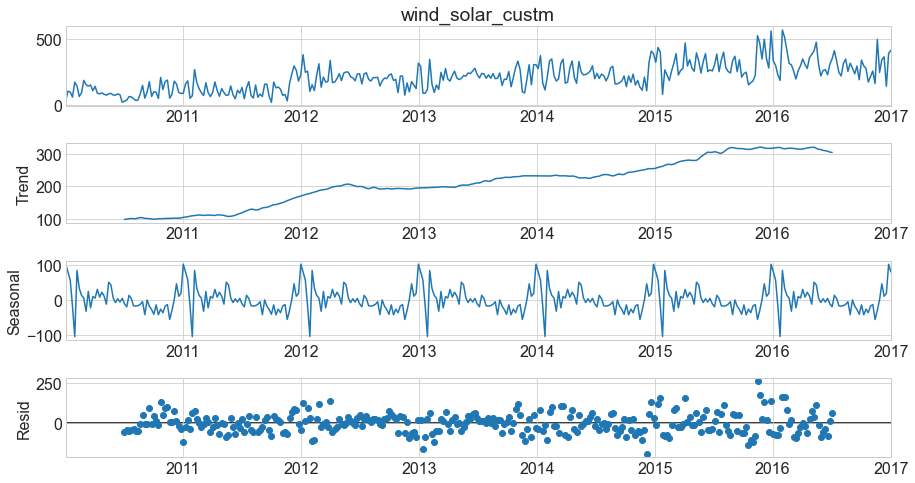

In [67]:
result.plot()

---------

### Categories Overtime 

In [132]:
train = train.resample('D').mean()
# create a categorical feature
train['wind_solar_custm_bin'] = pd.qcut(train.wind_solar_custm, [0.25, .5, .75])
train.groupby('wind_solar_custm_bin').mean()

,wind_solar_custm
wind_solar_custm_bin,
"(113.35499999999999, 194.703]",155.901375
"(194.703, 275.032]",232.448651


In [133]:
train.head()

,wind_solar_custm,wind_solar_custm_bin
Date,,
2010-01-01,48.709,NaN
2010-01-02,24.628,NaN
2010-01-03,22.963,NaN
2010-01-04,59.318,NaN
2010-01-05,41.624,NaN


In [134]:
(train.groupby('wind_solar_custm_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum())
 .plot.area()
)
plt.ylabel('% of days in the month')

AttributeError: 'int' object has no attribute 'sum'

ParserError: Unknown string format: (2015-01-31 00:00:00, (113.35499999999999, 194.703])

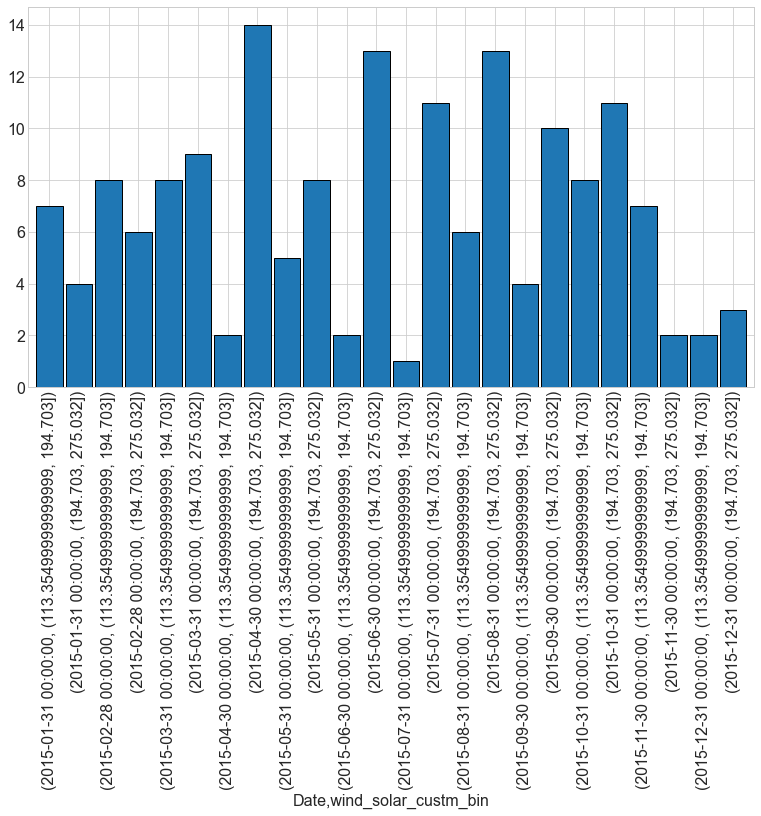

In [135]:
ax = (train['2015']
 .groupby('wind_solar_custm_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

------

### strftime

#### - A common problem we can run into when visualizing time series data is that the order of the months or days of the week logically is not the same as the order alphabetically. One workaround for this is to format the dates such that the have a number prepended to them 

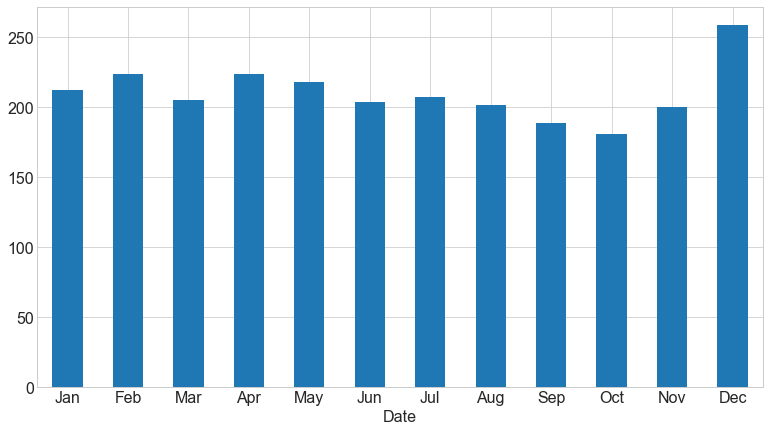

In [70]:
ax = y.groupby(y.index.strftime('%m-%b')).mean().plot.bar()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0)
None

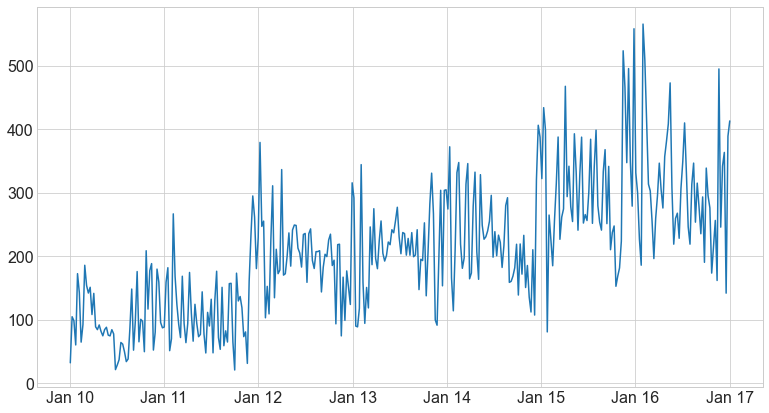

In [71]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))